<a href="https://colab.research.google.com/github/Ananthasireesh/leadsquared_assignment/blob/main/Review_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
import spacy
from spacy import displacy




In [2]:
data_path = "/content/drive/My Drive/NLP/Womens_Clothing_Reviews.csv"
review_data = pd.read_csv(data_path, index_col="Unnamed: 0")

In [3]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
#Lets take out only data with clothing_id 1078 for the analysis
review_data["Clothing ID"].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
776        1
668        1
633        1
734        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64

### we have only 1024 rows with clothing id of 1078, so lets take only those rows for analyis

In [5]:
review_data = review_data[review_data['Clothing ID'] == 1078]

In [6]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 69 to 23465
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              1024 non-null   int64 
 1   Age                      1024 non-null   int64 
 2   Title                    871 non-null    object
 3   Review Text              987 non-null    object
 4   Rating                   1024 non-null   int64 
 5   Recommended IND          1024 non-null   int64 
 6   Positive Feedback Count  1024 non-null   int64 
 7   Division Name            1024 non-null   object
 8   Department Name          1024 non-null   object
 9   Class Name               1024 non-null   object
dtypes: int64(5), object(5)
memory usage: 88.0+ KB


In [7]:
review_data["Department Name"].value_counts()

Dresses    1024
Name: Department Name, dtype: int64

In [8]:
review_data["Class Name"].value_counts()

Dresses    1024
Name: Class Name, dtype: int64

In [9]:
review_data["Division Name"].value_counts()

General           628
General Petite    396
Name: Division Name, dtype: int64

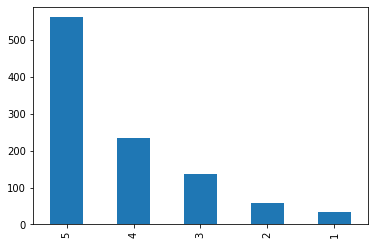

In [10]:
review_data['Rating'].value_counts().plot(kind='bar');

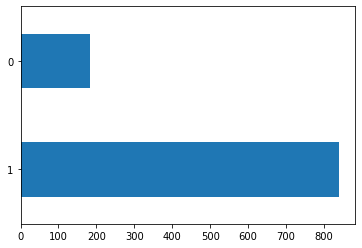

In [11]:
review_data['Recommended IND'].value_counts().plot(kind='barh');

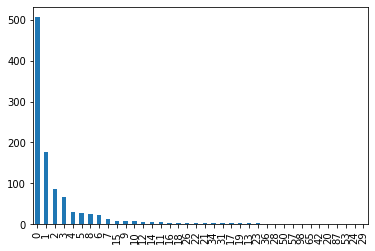

In [12]:
review_data['Positive Feedback Count'].value_counts().plot(kind='bar');

since class name, Department name and Division Name are unique and seems it does not add any value to our problem, am removing it and even here we are not considering any Age as well so i would plan to remove it as well, but positive feedback count, recommended Ind, and rating could give us some sentiment around the product, so lets find a way to actually use those in further analysis

In [13]:
def data_cleanup(data_path):
  """ Function to cleanup the data"""
  df = pd.read_csv(data_path, index_col="Unnamed: 0") #Make first column as index, and red the csv file
  df = df[df['Clothing ID'] == 1078] #take only those rows with clothing id of 1078 for analysis
  df = df[df["Review Text"].notna()] # need to get only rows with not na in review_text
  df = df.reset_index(drop=True) #reset index and drop the index column after removing the other columns 
  df = df.drop(columns=["Division Name", "Class Name", "Department Name", "Age","Clothing ID"])
  df.columns = ["Title", "Review_Text", "Rating", "Recommend", "PFC"]

  return df

In [14]:
review_data = data_cleanup("/content/drive/My Drive/NLP/Womens_Clothing_Reviews.csv")

In [15]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        871 non-null    object
 1   Review_Text  987 non-null    object
 2   Rating       987 non-null    int64 
 3   Recommend    987 non-null    int64 
 4   PFC          987 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.7+ KB


In [16]:
review_data["Review_Text"].head(100)

0     I really wanted this to work. alas, it had a s...
1     I love cute summer dresses and this one, espec...
2     This is the perfect summer dress. it can be dr...
3     Nice fit and flare style, not clingy at all. i...
4     When i first opened this dress and tried it on...
                            ...                        
95    This dress is so soft and comfortable. great w...
96    I love this dress! i generally wear size 10 an...
97    This dress is adorable. it's easy to wear, rea...
98    I wanted to love this dress..and it did not di...
99    Casual comfort with style! fabric is a dream t...
Name: Review_Text, Length: 100, dtype: object

Lets understand the column of title much more and see something can help our analysis 

In [17]:
print(review_data["Title"].head())
print(review_data["Title"].tail())

0      Great summer fabric!
1    Sweet flattering dress
2                       NaN
3      Great sweater dress!
4           Cute, but cheap
Name: Title, dtype: object
982                      NaN
983    Flattering and unique
984            Breathtaking!
985         Such high hopes!
986             Falls nicely
Name: Title, dtype: object


Let us try NER and try to see if we can get any entity and adjective relationship

In [18]:
NER = spacy.load("en_core_web_sm")
raw_text="This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!"
text1= NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

This purticular sentence is not returning anykind of entities, actually as expected this is a dress review, which will have only entities of measurement on maximum, so getting entities relation like "Adjustable front tie" or "flattering shirt" cannot be expected, so lets try to get relation between adjectives and nouns by doing part of speech tagging. 

In [19]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(r'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!')
rel_list=[]

for token in doc:
    #print(f"{token.dep_}({token.head.text}-{token.head.i+1}, {token.text}-{token.i+1})")
    rel_list.append(tuple((token.dep_,token.text,token.head.text,token.pos_,[child for child in token.children])))
for i in range(len(rel_list)):
  print(rel_list[i])

('det', 'This', 'shirt', 'DET', [])
('nsubj', 'shirt', 'is', 'NOUN', [This])
('ROOT', 'is', 'is', 'AUX', [shirt, flattering, due, .])
('advmod', 'very', 'flattering', 'ADV', [])
('acomp', 'flattering', 'is', 'ADJ', [very, to])
('prep', 'to', 'flattering', 'ADP', [all])
('pobj', 'all', 'to', 'DET', [])
('prep', 'due', 'is', 'ADP', [to, tie])
('pcomp', 'to', 'due', 'ADP', [])
('det', 'the', 'tie', 'DET', [])
('amod', 'adjustable', 'tie', 'ADJ', [])
('amod', 'front', 'tie', 'ADJ', [])
('pobj', 'tie', 'due', 'NOUN', [the, adjustable, front])
('punct', '.', 'is', 'PUNCT', [])
('nsubj', 'it', 'is', 'PRON', [])
('ROOT', 'is', 'is', 'AUX', [it, length, and, is])
('det', 'the', 'length', 'DET', [])
('amod', 'perfect', 'length', 'ADJ', [])
('attr', 'length', 'is', 'NOUN', [the, perfect, wear])
('aux', 'to', 'wear', 'PART', [])
('relcl', 'wear', 'length', 'VERB', [to, with])
('prep', 'with', 'wear', 'ADP', [leggings])
('pobj', 'leggings', 'with', 'NOUN', [])
('cc', 'and', 'is', 'CCONJ', [])
('nsu

In [20]:
displacy.render(doc, style="dep", jupyter=True, options={'distance': 100})

By looking at above relationship, we need to find out Noun and Adjective relationship when token is a subject or object and it has its children nodes with any of the adjectives, for example in above sentence we need to get entity relationship like "Adjustable front tie", lets write some rule to get simmilar kind of relationships 

In [21]:
def rule1(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN') and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
                    pat.append(phrase)
        
    
    return pat

In [22]:
text = "This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!"
pat = rule1(text)
print(pat)

['adjustable front tie']


In [23]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        871 non-null    object
 1   Review_Text  987 non-null    object
 2   Rating       987 non-null    int64 
 3   Recommend    987 non-null    int64 
 4   PFC          987 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.7+ KB


In [24]:
# Lets apply the rule for whole data 
# create a df containing sentence and its output for rule 2
row_list = []

for i in range(len(review_data)):
    #print(review_data.loc[i,'Review_Text'])
    sent = str(review_data.loc[i,'Review_Text'])
    output = rule1(sent)
    dict1 = {'Review_Text':sent,'Output':output}
    row_list.append(dict1)

df_rule1 = pd.DataFrame(row_list)

In [25]:
df_rule1.head()

,Review_Text,Output
0,"I really wanted this to work. alas, it had a s...","[strange fit, weird fit]"
1,"I love cute summer dresses and this one, espec...","[cute summer dresses, c bust]"
2,This is the perfect summer dress. it can be dr...,"[linen fabric, smaller bust]"
3,"Nice fit and flare style, not clingy at all. i...","[grey large color, color options]"
4,When i first opened this dress and tried it on...,"[hourglass figure, recent baby weight, good ir..."


In [26]:
# Lets apply the rule for whole data 
# create a df containing sentence and its output for rule 1
def Apply_Rule(df,rule):
  Output = []
  for i in range(len(df)):
    #print(review_data.loc[i,'Review_Text'])
    sent = str(df.loc[i,'Review_Text'])
    output = rule(sent)
    Output.append(output)
    #row_list.append(dict1)
  df["Output"] = Output
  return df
df_rule1 = Apply_Rule(review_data,rule1)

In [27]:
df_rule1.head()

,Title,Review_Text,Rating,Recommend,PFC,Output
0,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,"[strange fit, weird fit]"
1,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,"[cute summer dresses, c bust]"
2,NaN,This is the perfect summer dress. it can be dr...,5,1,2,"[linen fabric, smaller bust]"
3,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,"[grey large color, color options]"
4,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,"[hourglass figure, recent baby weight, good ir..."


In [28]:
df_rule2 = df_rule1[df_rule1["Output"].str.len() == 0]
df_rule2 = df_rule2.reset_index(drop=True)

It seems this rule really worked out well and only 20% out of these text did not get any such relationships, this is really gud, we can also try to add title with review_text and try getting those relationships, but am not doing this right now, for these 20% we can consider adjective to adjective relationships as they would have mentioned any noun with the adjective

In [29]:
""" Lets define a new rule, that can actually help us to find other relationships of adjective to adjective"""
def rule2(text):
    
    doc = nlp(text)

    rel_list=[]
    key_rels=[]
    # to match the output style of the Stanford library for comparison...
    for token in doc:
      rel_list.append(tuple((token.dep_,token.text,token.head.text,token.pos_)))
    
    # iterate over list
    for i in range(len(rel_list)):
      if rel_list[i][0] == 'amod':
        key_rels.append(rel_list[i][1] + " " +rel_list[i][2]) 
      elif rel_list[i][0] == 'advmod':
        key_rels.append(rel_list[i][1] + " " +rel_list[i][2]) 
    return key_rels

In [30]:
text = "Extremely flattering. an easy dress to wear"
doc = nlp(text)
pat = rule2(text)
print(pat)

['Extremely flattering', 'easy dress']


In [31]:
displacy.render(doc, style="dep", jupyter=True, options={'distance': 100})

In [32]:
# Lets apply rule2 only for those which rule1 has not been passed 
# Lets apply the rule for whole data 
# create a df containing sentence and its output for rule 1
df_rule2 = Apply_Rule(df_rule2,rule2)

In [33]:
df_rule2.head()

,Title,Review_Text,Rating,Recommend,PFC,Output
0,Fun dress,Extremely flattering. an easy dress to wear - ...,5,1,1,"[Extremely flattering, easy dress]"
1,NaN,"Very cute, very comfortable. for me aesthetics...",5,1,2,"[Very cute, cute comfortable, very comfortable]"
2,Love this dress,Very comfortable and versatile. got lots of co...,5,1,0,[Very comfortable]
3,I'm in love!,I love this shirtdress. the lace and collar de...,5,1,0,"[super comfortable, back going, ever going, so..."
4,NaN,"Love this dress! it is super-flattering, and t...",5,1,1,[]


In [34]:
len(df_rule2[df_rule2["Output"].str.len() == 0])

16

There are only 16 rows which did not have Any rule that passed, we can either ignore these rows or we can apply rule2 to title + review_text and try it 

In [35]:
#lets drop the output from df_rule, and then pass review_text as title + review text
df_rule2.drop(columns="Output",inplace=True)
df_rule2["Title"] = df_rule2["Title"].fillna('')
df_rule2["Review_Text"] = df_rule2["Title"] + " " + df_rule2["Review_Text"]
df_rule2.head()

,Title,Review_Text,Rating,Recommend,PFC
0,Fun dress,Fun dress Extremely flattering. an easy dress ...,5,1,1
1,,"Very cute, very comfortable. for me aesthetic...",5,1,2
2,Love this dress,Love this dress Very comfortable and versatile...,5,1,0
3,I'm in love!,I'm in love! I love this shirtdress. the lace ...,5,1,0
4,,"Love this dress! it is super-flattering, and ...",5,1,1


In [36]:
df_rule2 = Apply_Rule(df_rule2,rule2)

In [37]:
len(df_rule2[df_rule2["Output"].str.len() == 0])

10

Now there are only 10 rows which did not pass in both the rules, lets ignore this as of now. 

In [38]:
df_rule2.head()

,Title,Review_Text,Rating,Recommend,PFC,Output
0,Fun dress,Fun dress Extremely flattering. an easy dress ...,5,1,1,"[Fun dress, Extremely flattering, easy dress]"
1,,"Very cute, very comfortable. for me aesthetic...",5,1,2,"[Very cute, cute comfortable, very comfortable]"
2,Love this dress,Love this dress Very comfortable and versatile...,5,1,0,[Very comfortable]
3,I'm in love!,I'm in love! I love this shirtdress. the lace ...,5,1,0,"[super comfortable, back going, ever going, so..."
4,,"Love this dress! it is super-flattering, and ...",5,1,1,[]


In [39]:
#drop those rows from df_rule1 which has output as empty list 
df_rule1 = df_rule1[df_rule1["Output"].str.len() >= 1]

In [40]:
#concat both df_rule1 and df_rule2
review_data_output = pd.concat([df_rule1,df_rule2], axis= 0)

In [44]:
review_data_output.head()

,Title,Review_Text,Rating,Recommend,PFC,Output
0,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,"[strange fit, weird fit]"
1,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,"[cute summer dresses, c bust]"
2,NaN,This is the perfect summer dress. it can be dr...,5,1,2,"[linen fabric, smaller bust]"
3,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,"[grey large color, color options]"
4,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,"[hourglass figure, recent baby weight, good ir..."


In [45]:
review_data_output.tail()

,Title,Review_Text,Rating,Recommend,PFC,Output
181,Nice but wrong fit,Nice but wrong fit The material is awesome and...,3,0,0,"[Nice fit, super pretty, pretty dress, just work]"
182,Even better than expected!,Even better than expected! This dress is so mu...,5,1,0,"[Even better, so much, much prettier, both for]"
183,Absolutely elegant.,Absolutely elegant. This dress is beautiful an...,5,1,1,"[Absolutely elegant, very flattering, right at..."
184,,This is a beautiful dress and fits well. the ...,5,1,1,"[beautiful dress, well fits, easily snag]"
185,Breathtaking!,Breathtaking! This is the most beautiful dress...,5,1,0,"[most beautiful, beautiful dress, ever owned, ..."


In [46]:
#write the dataframe to csv
review_data_output.to_csv("/content/drive/My Drive/NLP/Review_data_Labelled.csv")